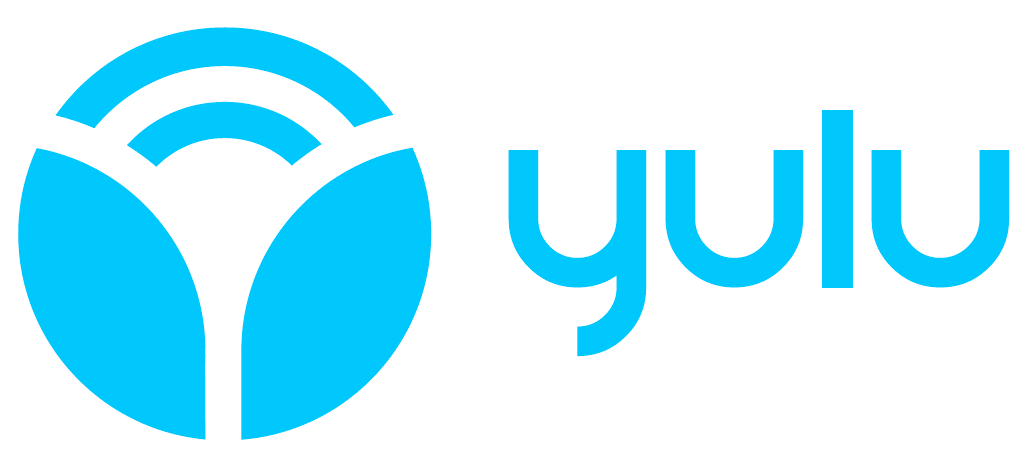

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spy
from scipy.stats import kruskal

# 1. Define the Problem Statement, Import the required Libraries and perform Exploratory Data Analysis.
* Examine dataset structure, characteristics, and statistical summary.
Hint: You can use .shape, .info(), .describe()
* Identify missing values and perform Imputation using an appropriate method.
 Hint: You can use .isnull() or .isna()
* Identify and remove duplicate records.
 Hint: You can use .duplicated()
* Analyze the distribution of Numerical & Categorical variables, separately
Hint:
i. For Numerical features use Histogram, Distplot, etc.
ii. Hint: For Categorical features use Countplot, Pie Chart, etc.
* Check for Outliers and deal with them accordingly.
Hint:
i. You can use Boxplot, Interquartile Range (IQR)
ii. Remove/Clip existing outliers as necessary.

In [2]:
df = pd.read_csv(r"C:\Users\Dhrubo\Desktop\bike_sharing.csv")

In [3]:
data=df

In [4]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
row, col = data.shape

In [6]:
row, col

(10886, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [9]:
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

* change date time data type from object to datetime formate

In [10]:
data['datetime'] = pd.to_datetime(data['datetime'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [12]:
data.drop_duplicates(keep = 'first', inplace = True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1.1 MB


In [14]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [15]:
np.round(data['season'].value_counts(normalize = True) * 100, 2)

4    25.11
2    25.11
3    25.11
1    24.67
Name: season, dtype: float64

In [16]:
np.round(data['holiday'].value_counts(normalize = True) * 100, 2)

0    97.14
1     2.86
Name: holiday, dtype: float64

In [17]:
np.round(data['workingday'].value_counts(normalize = True) * 100, 2)

1    68.09
0    31.91
Name: workingday, dtype: float64

In [18]:
np.round(data['weather'].value_counts(normalize = True) * 100, 2)

1    66.07
2    26.03
3     7.89
4     0.01
Name: weather, dtype: float64

* Above data provide us the infomation on the central tenddence, spread and range of the numerical features in the dataset.

# Insight
* There are no missing values
* There are no duplicate row i.e if we compare number rows before and after removing duplicates are same.
* We have change the datetime col data type from object to datetime formate.
* Number rows and col are 10886 & 12
* Min max temperature 0.8 and 41 celcius.
* Min max casual 0 and 367.

What is the time period for which the data is given ?

In [19]:
data['datetime'].max()

Timestamp('2012-12-19 23:00:00')

In [20]:
data['datetime'].min()

Timestamp('2011-01-01 00:00:00')

In [21]:
data['datetime'].max() - data['datetime'].min()

Timedelta('718 days 23:00:00')

In [22]:
# setting datetime as index
df.set_index('datetime', inplace = True)

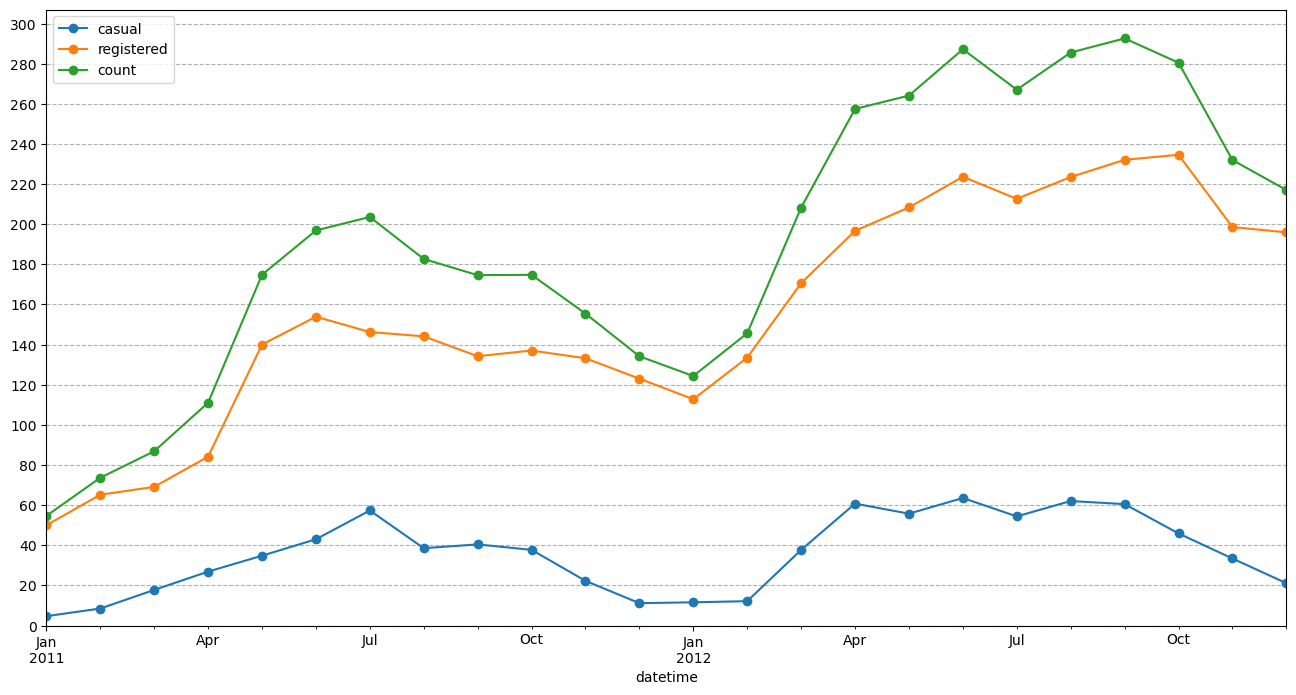

In [23]:
# The below code visualizes the trend of the monthly average values for the 'casual', 'registered', 
    # and 'count' variables,  allowing for easy comparison and analysis of their patterns over time
    
plt.figure(figsize = (16, 8))

data.resample('M')['casual'].mean().plot(kind = 'line', legend = 'casual', marker = 'o')
data.resample('M')['registered'].mean().plot(kind = 'line', legend = 'registered', marker = 'o')
data.resample('M')['count'].mean().plot(kind = 'line', legend = 'count', marker = 'o')

plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 301, 20))
plt.ylim(0,)    
plt.show()  

I want to know if there is an increase in the average hourly count of rental bikes from the year 2011 to 2012

In [24]:
# resampling the DataFrame by the year 
df1 = data.resample('Y')['count'].mean().to_frame().reset_index()

# Create a new column 'prev_count' by shifting the 'count' column one position up 
    # to compare the previous year's count with the current year's count
df1['prev_count'] = df1['count'].shift(1) 

# Calculating the growth percentage of 'count' with respect to the 'count' of previous year
df1['growth_percent'] = (df1['count'] - df1['prev_count']) * 100 / df1['prev_count']
df1

,datetime,count,prev_count,growth_percent
0,2011-12-31,144.223349,NaN,NaN
1,2012-12-31,238.560944,144.223349,65.410764


   * This data suggests that there was substantial growth in the count of the variable over the course of one year.
   * The mean total hourly count of rental bikes is 144 for the year 2011 and 239 for the year 2012. An annual growth rate of 65.41 % can be seen in the demand of electric vehicles on an hourly basis.

It indicates positive growth and potentially a successful outcome or increasing demand for the variable being measured.

In [25]:
df.reset_index(inplace = True)

[]

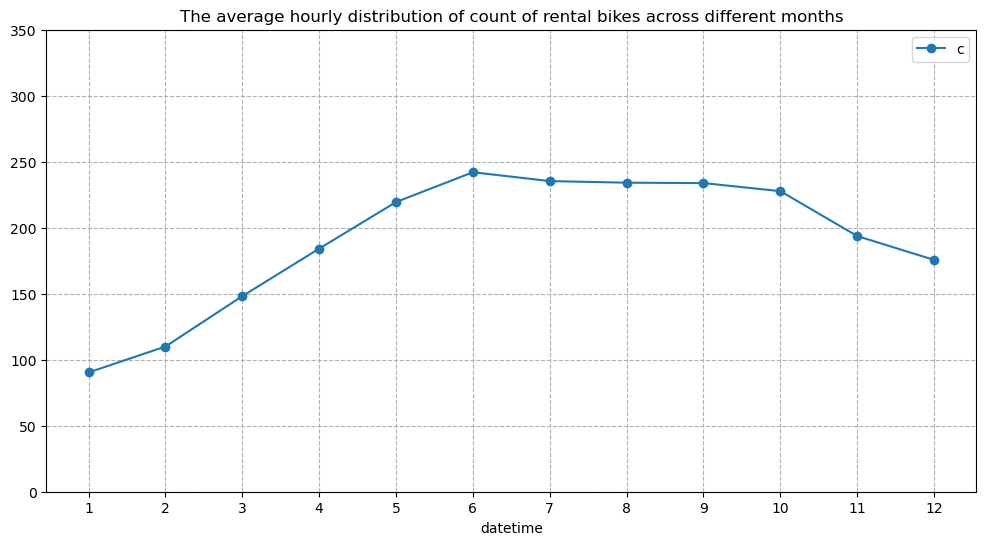

In [26]:
# The resulting plot visualizes the average hourly distribution of the count of rental bikes for each 
    # month, allowing for comparison and identification of any patterns or trends throughout the year.


plt.figure(figsize = (12, 6))
plt.title("The average hourly distribution of count of rental bikes across different months")
data.groupby(by = data['datetime'].dt.month)['count'].mean().plot(kind = 'line', marker = 'o')

plt.ylim(0,)   
plt.xticks(np.arange(1, 13)) 
plt.legend('count')   
plt.yticks(np.arange(0, 400, 50))

plt.grid(axis = 'both', linestyle = '--')
plt.plot()    



  * The average hourly count of rental bikes is the highest in the month of June followed by July and August.
  * The average hourly count of rental bikes is the lowest in the month of January followed by February and March.

Overall, these trends suggest a seasonal pattern in the count of rental bikes, with higher demand during the spring and summer months, a slight decline in the fall, and a further decrease in the winter months. It could be useful for the rental bike company to consider these patterns for resource allocation, marketing strategies, and operational planning throughout the year.


# Graphical analysis

Text(0.5, 1.0, 'count')

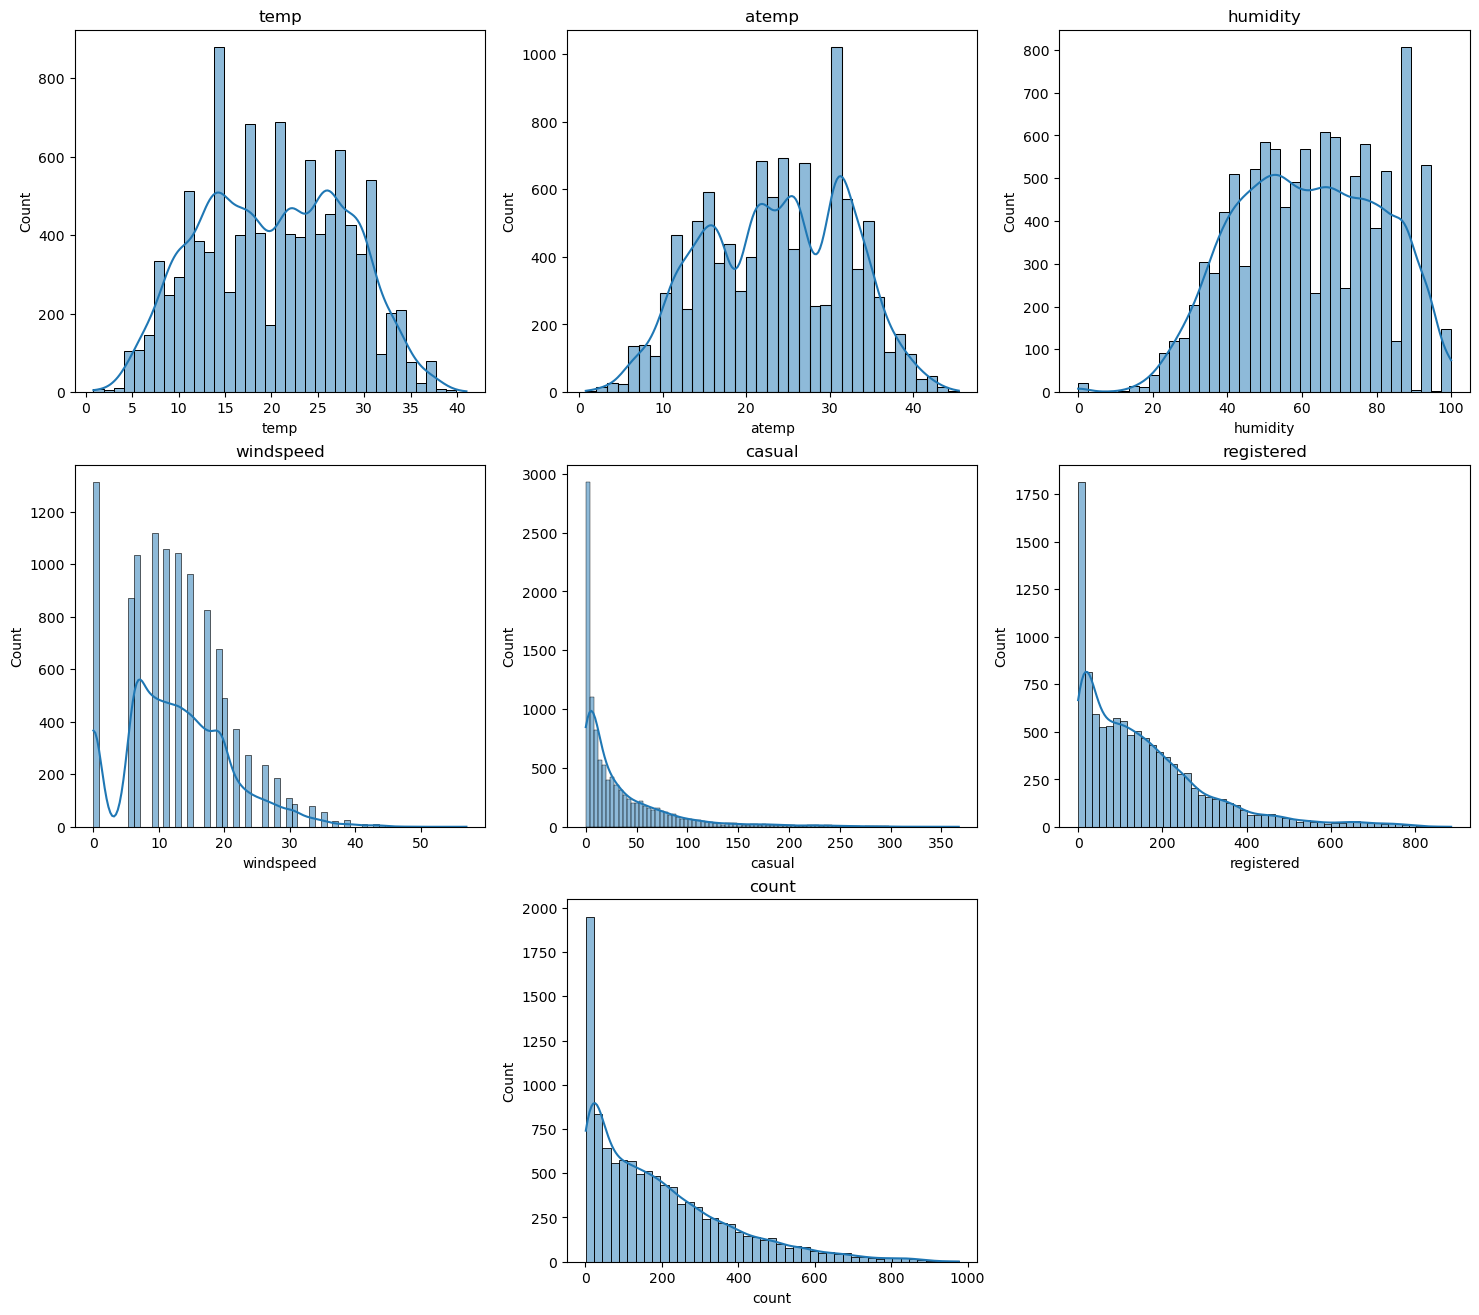

In [27]:
plt.figure(figsize=(18,16))
plt.subplot(3,3,1)
sns.histplot(x=data['temp'], kde =True)
plt.title('temp')

plt.subplot(3,3,2)
sns.histplot(x=data['atemp'], kde =True)
plt.title('atemp')

plt.subplot(3,3,3)
sns.histplot(x=data['humidity'], kde =True)
plt.title('humidity')

plt.subplot(3,3,4)
sns.histplot(x=data['windspeed'], kde =True)
plt.title('windspeed')

plt.subplot(3,3,5)
sns.histplot(x=data['casual'], kde =True)
plt.title('casual')

plt.subplot(3,3,6)
sns.histplot(x=data['registered'], kde =True)
plt.title('registered')

plt.subplot(3,3,8)
sns.histplot(x=data['count'], kde =True)
plt.title('count')

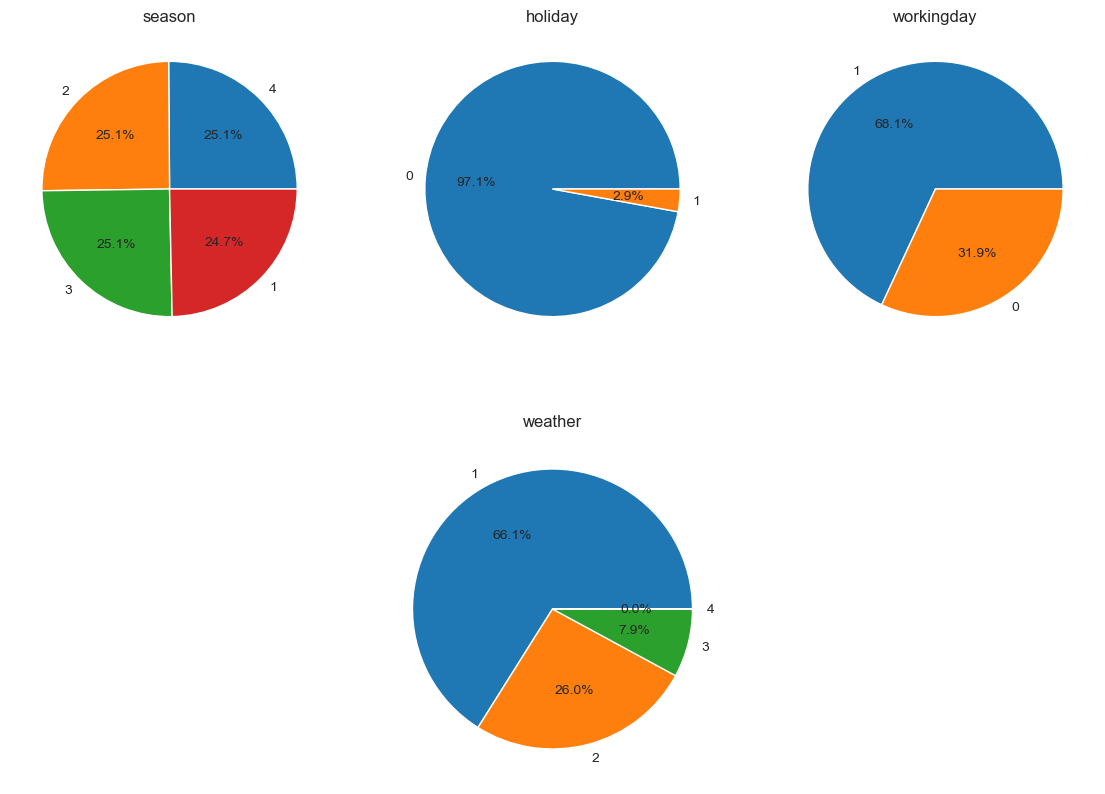

In [28]:
sns.set_style("whitegrid")
plt.figure(figsize=(14,10))
plt.subplot(2,3,1)
plt.pie(data['season'].value_counts(), labels=data['season'].value_counts().index, autopct='%1.1f%%')
plt.title('season')

plt.subplot(2,3,2)
plt.pie(data['holiday'].value_counts(), labels=data['holiday'].value_counts().index, autopct='%1.1f%%')
plt.title('holiday')

plt.subplot(2,3,3)
plt.pie(data['workingday'].value_counts(), labels=data['workingday'].value_counts().index, autopct='%1.1f%%')
plt.title('workingday')

plt.subplot(2,1,2)
plt.pie(data['weather'].value_counts(), labels=data['weather'].value_counts().index, autopct='%1.1f%%')
plt.title('weather')
plt.show()

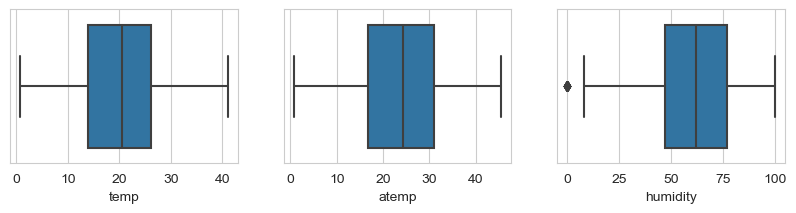

In [29]:
plt.figure(figsize=(10,2))
plt.subplot(1,3,1)
sns.boxplot(x=data['temp'])

plt.subplot(1,3,2)
sns.boxplot(x=data['atemp'])

plt.subplot(1,3,3)
sns.boxplot(x=data['humidity'])

plt.show()

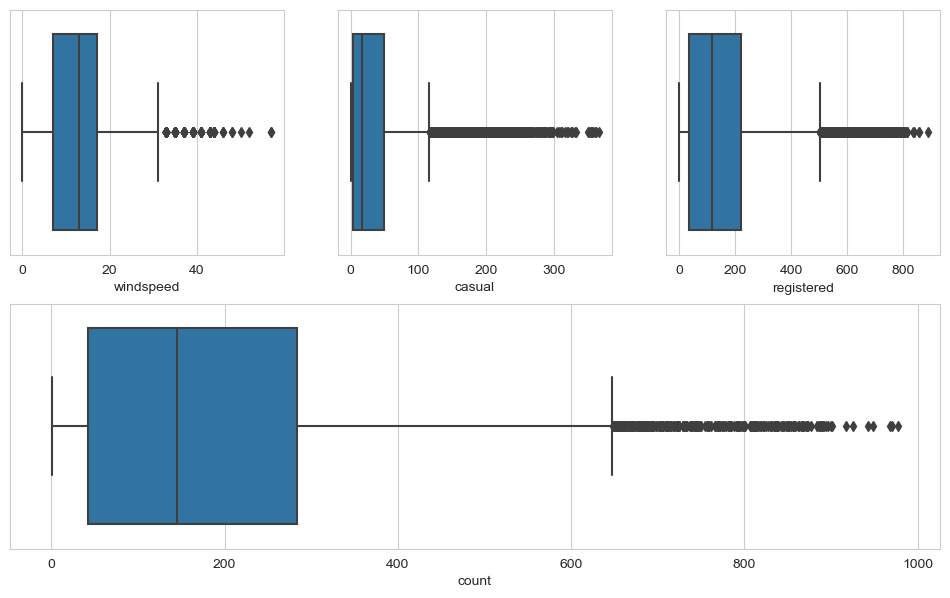

In [30]:
plt.figure(figsize=(12,7))
plt.subplot(2,3,1)
sns.boxplot(x=data['windspeed'])

plt.subplot(2,3,2)
sns.boxplot(x=data['casual'])

plt.subplot(2,3,3)
sns.boxplot(x=data['registered'])

plt.subplot(2,1,2)
sns.boxplot(x=data['count'])

plt.show()

In [31]:
y1axis =  data.groupby('season')['casual'].sum()
x1axis = data['season'].unique()

y2axis = data.groupby('season')['registered'].sum()
x2axis = data['season'].unique()

y3axis = data.groupby('season')['count'].sum()
x3axis = data['season'].unique()

C:\Users\Dhrubo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dhrubo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dhrubo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


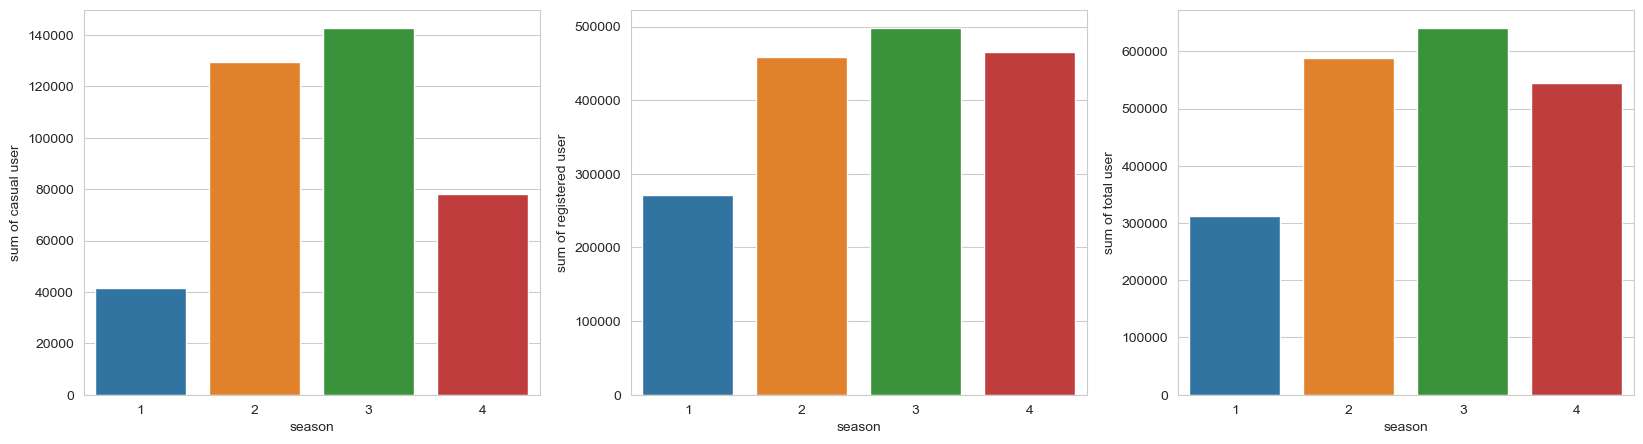

In [32]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.barplot(x1axis,y1axis)
plt.ylabel('sum of casual user')
plt.xlabel('season')

plt.subplot(1,3,2)
sns.barplot(x2axis,y2axis)
plt.ylabel('sum of registered user')
plt.xlabel('season')

plt.subplot(1,3,3)
sns.barplot(x3axis,y3axis)
plt.ylabel('sum of total user')
plt.xlabel('season')

plt.show()

# Insights:
* No outliers for temp & atemp.
* There are good outliers present for humidity, windspeed, casual, registered & count.
* we can refer the describe() to see 25% & 75% and mean.
  example: count of total rental bikes including both casual and registered having most number between 284 & 42 with mean              191. 

# Lets remove the outliers

* Humidity

In [33]:
IQR = 77 -47 # IQR = Q3-Q1

In [34]:
lower_limit_iqr = 47 - (1.5*IQR) #q1 - (1.5 * IQR)

In [35]:
lower_limit_iqr 

2.0

In [36]:
data = data[data['humidity'] > 2]

* windspeed

In [37]:
IQR = 16.9979 -7.0015 # IQR = Q3-Q1

In [38]:
higher_limit_iqr = 16.9979 + (1.5*IQR) #q1 - (1.5 * IQR)

In [39]:
higher_limit_iqr 

31.992500000000003

In [40]:
data = data[data['windspeed'] < 31.992500000000003]

* casual

In [41]:
IQR = 49 -4 # IQR = Q3-Q1
higher_limit_iqr = 49 + (1.5*IQR) #q1 - (1.5 * IQR)

In [42]:
higher_limit_iqr 

116.5

In [43]:
data = data[data['casual'] < 116.5]

* registered

In [44]:
IQR = 222 -36 # IQR = Q3-Q1
higher_limit_iqr = 222 + (1.5*IQR) #q1 - (1.5 * IQR)

In [45]:
higher_limit_iqr 

501.0

In [46]:
data = data[data['registered'] < 501.0]

* count

In [47]:
IQR = 284 -42 # IQR = Q3-Q1
higher_limit_iqr = 284 + (1.5*IQR) #q1 - (1.5 * IQR)

In [48]:
higher_limit_iqr 

647.0

In [49]:
data = data[data['count'] < 647.0]

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9517 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    9517 non-null   datetime64[ns]
 1   season      9517 non-null   int64         
 2   holiday     9517 non-null   int64         
 3   workingday  9517 non-null   int64         
 4   weather     9517 non-null   int64         
 5   temp        9517 non-null   float64       
 6   atemp       9517 non-null   float64       
 7   humidity    9517 non-null   int64         
 8   windspeed   9517 non-null   float64       
 9   casual      9517 non-null   int64         
 10  registered  9517 non-null   int64         
 11  count       9517 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 966.6 KB


# Insights
* we have tried remove the outliers to a great extend.
* We can see from catagorical col that bikes rented on evry season are almost same.
* bike rented on working days are more.
* bike reted on weather 1 clear few clouds partly clouds day is most.
* bike rented on season 3 i.e fall is more compare to all.
* new user registered on fall is more.

# Try establishing a Relationship between the Dependent and Independent Variables.
Hint:
* Plot a Correlation Heatmap and draw insights.
* Remove the highly correlated variables, if any

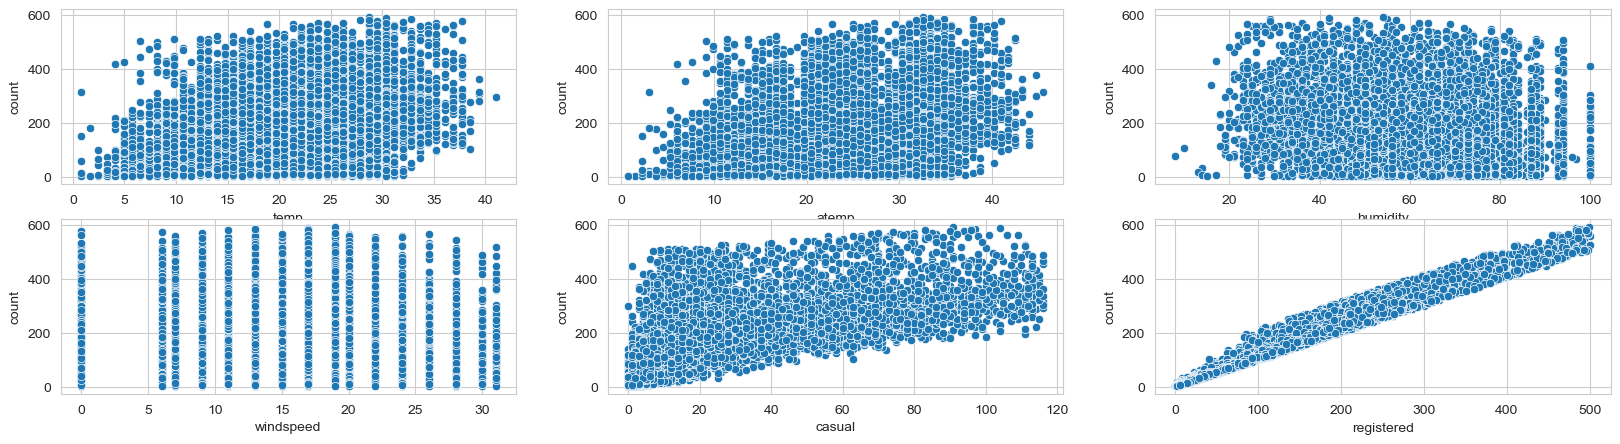

In [51]:
plt.figure(figsize=(20,5))
plt.subplot(2,3,1)
sns.scatterplot( data=data, x='temp', y='count')

plt.subplot(2,3,2)
sns.scatterplot( data=data, x='atemp', y='count')

plt.subplot(2,3,3)
sns.scatterplot( data=data, x='humidity', y='count')

plt.subplot(2,3,4)
sns.scatterplot( data=data, x='windspeed', y='count')

plt.subplot(2,3,5)
sns.scatterplot( data=data, x='casual', y='count')

plt.subplot(2,3,6)
sns.scatterplot( data=data, x='registered', y='count')

plt.show()

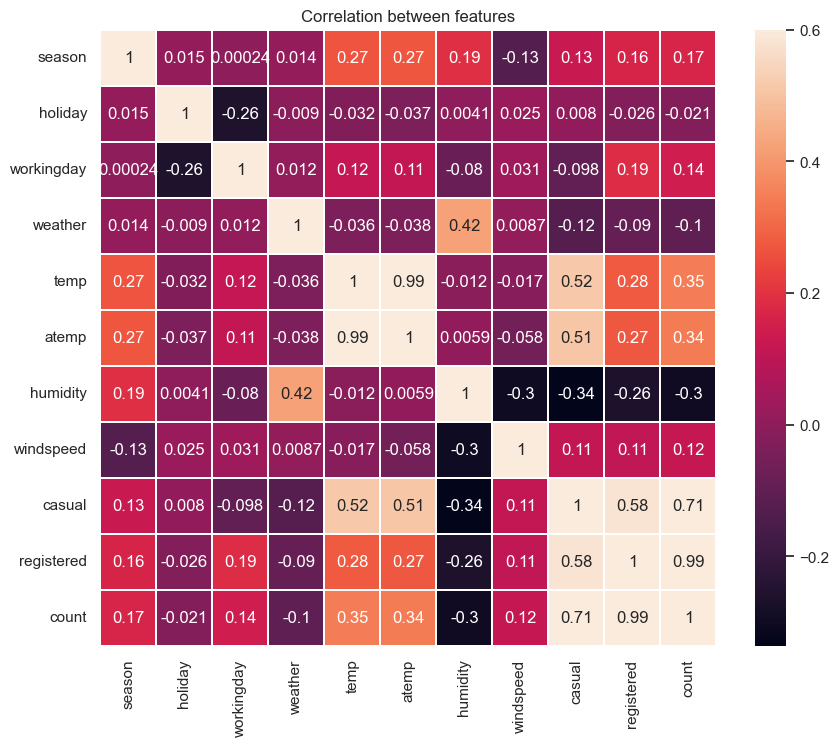

In [52]:
sns.set(font_scale=1.0)
plt.figure(figsize=(10,8))
correlation_values = data.corr(method = 'pearson')
sns.heatmap(correlation_values, vmax = .6, linewidths=0.01, square=True, annot=True)
plt.title('Correlation between features');

# Insights
* we observed temp & atemp is positively correlated with count, it mean temp increase does iincreases the bike ride counts also.
* But where as humidity is negatively correlated with count of bike ride.
* Very High Correlation (> 0.9) exists between columns [atemp, temp] and [count, registered]
* High positively / negatively correlation (0.7 - 0.9) does not exist between any columns.
* Moderate positive correlation (0.5 - 0.7) exists between columns [casual, count], [casual, registered].
* Low Positive correlation (0.3 - 0.5) exists between columns [count, temp], [count, atemp], [casual, atemp]
* Negligible correlation exists between all other combinations of columns.



# Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?
* Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)
* Select an appropriate test -
i. Hint: 2- Sample Independent T-test
* Set a significance level
i. Hint: alpha=5% is recommended
* Calculate test Statistics / p-value
* Decide whether to accept or reject the Null Hypothesis.
Hint:
i. If the p-value is less than or equal to the predetermined level of
significance (alpha), we have evidence to reject the null hypothesis.
ii. If the p-value is greater than the predetermined level of significance
(alpha), we do not have sufficient evidence to reject the null hypothesis.
* Draw inferences & conclusions from the analysis and provide recommendations.

---------------------------------------------------------------------------------------------------------------------------

* STEP-1 : Set up Null Hypothesis

    Null Hypothesis ( H0 ) - weekDay does not have any effect on the number of electric cycles rented.

    Alternate Hypothesis ( HA ) - weekDay has some effect on the number of electric cycles rented

* STEP-2 : Checking for basic assumpitons for the hypothesis

    Distribution check using QQ Plot
    Homogeneity of Variances using Levene's test

* STEP-3: Define Test statistics; Distribution of T under H0.

    If the assumptions of T Test are met then we can proceed performing T Test for independent samples else we will perform the non parametric test equivalent to T Test for independent sample i.e., Mann-Whitney U rank test for two independent samples.

* STEP-4: Compute the p-value and fix value of alpha.

    We set our alpha to be 0.05

* STEP-5: Compare p-value and alpha.

[]

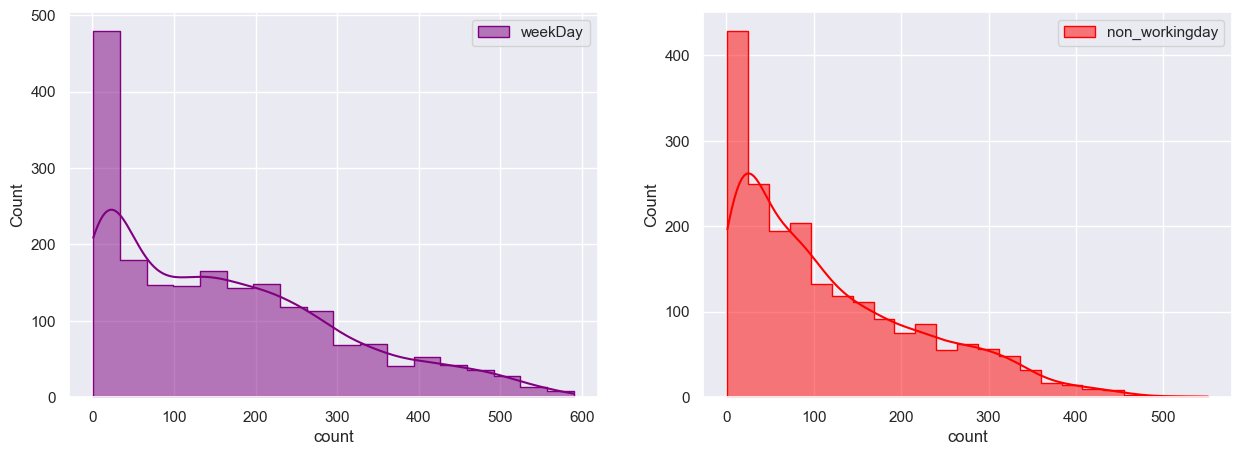

In [53]:
# Visual Tests to know if the samples follow normal distribution

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data.loc[data['workingday'] == 1, 'count'].sample(2000), 
             element = 'step', color = 'purple', kde = True, label = 'weekDay')
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(data.loc[data['workingday'] == 0, 'count'].sample(2000), 
             element = 'step', color = 'red', kde = True, label = 'non_workingday')
plt.legend()
plt.plot()

It can be inferred from the above plot that the distributions do not follow normal distribution.

[]

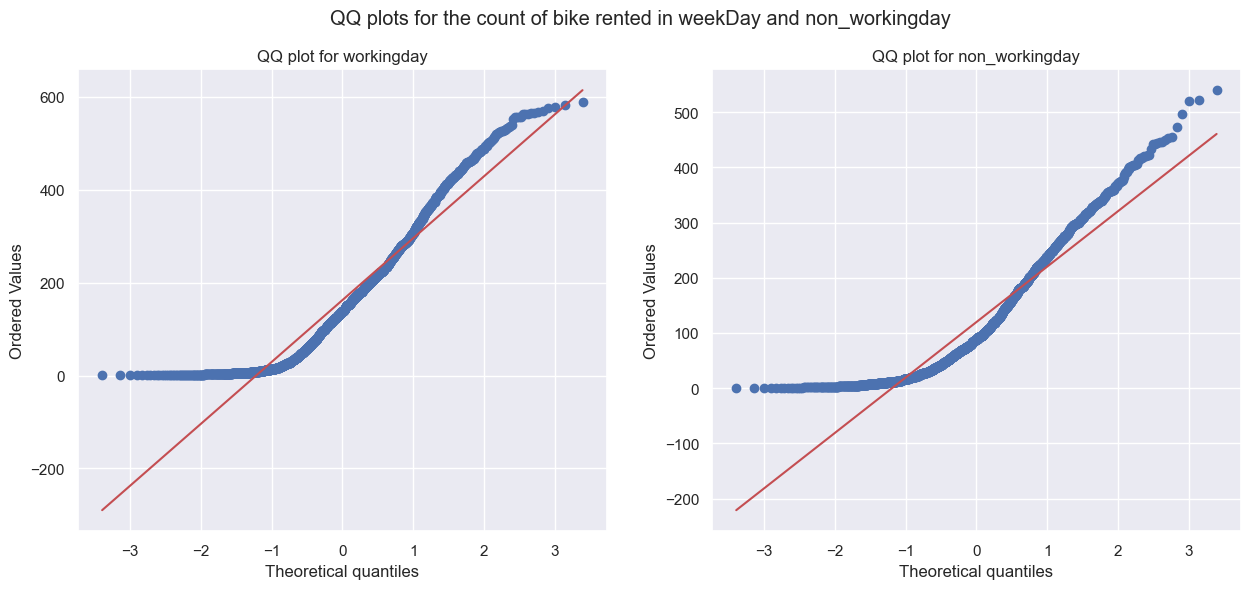

In [54]:
# Distribution check using QQ Plot

plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for the count of bike rented in weekDay and non_workingday')
spy.probplot(data.loc[data['workingday'] == 1, 'count'].sample(2000), plot = plt, dist = 'norm')
plt.title('QQ plot for workingday')
plt.subplot(1, 2, 2)
spy.probplot(data.loc[data['workingday'] == 0, 'count'].sample(2000), plot = plt, dist = 'norm')
plt.title('QQ plot for non_workingday')
plt.plot()

It can be inferred from the above plot that the distributions do not follow normal distribution.

Applying Shapiro-Wilk test for normality

* Ho : The sample follows normal distribution

* Ha: The sample does not follow normal distribution

* alpha = 0.05

* Test Statistics : Shapiro-Wilk test for normality

In [55]:
test_stat, p_value = spy.shapiro(data.loc[data['workingday'] == 1, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')    

p-value 1.6642229367458703e-31
The sample does not follow normal distribution


# Hence, We cannot use 2 sample T test doe to non normality of the data. We will use kruskal wallis test.

* Ho : There is no significance difference between median bike rides on Weekdays
and Weekends 

* Ha: There is significance difference between median bike rides on Weekdays
and Weekends

* alpha = 0.05

* Test Statistics : Shapiro-Wilk test for normality

In [56]:
bike_rides_weekdays = data[data['workingday']==1]

In [57]:
bike_rides_non_workdays = data[data['workingday']==0]

In [59]:
bike_rides_weekdays_sample=bike_rides_weekdays['count'].sample(20)

In [60]:
bike_rides_non_workdays_sample = bike_rides_non_workdays['count'].sample(20)

In [61]:
stat, p_value = kruskal(bike_rides_weekdays_sample, bike_rides_non_workdays_sample)
print("test statistic:",stat)
print("p_value:",p_value)

if p_value < 0.05:
    print("Reject H0")
    print("There is significance difference between median bike rides on Weekdays and Weekends")
else:
    print("Fail to reject H0")
    print("There is no significance difference between median bike rides on Weekdays and Weekends")

test statistic: 0.15394255139398996
p_value: 0.6947958314011894
Fail to reject H0
There is no significance difference between median bike rides on Weekdays and Weekends


# There is no significance difference between median bike rides on Weekdays and Weekends

------------------

# Check if the demand of bicycles on rent is the same for different Weather conditions?
* Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)
* Select an appropriate test -
i. Hint: One-way ANOVA test
* Check assumptions of the test
i. Normality
Hint:
1. Use Histogram, Q-Q Plot, Skewness & Kurtosis
2. Shapiro-Wilk’s test
* Equality Variance
Hint:
1. Levene’s test
iii. Please continue doing the analysis even if some assumptions fail
(Levene’s test or Shapiro-wilk test) but double check using visual
analysis and report wherever necessary.
* Set a significance level and Calculate the test Statistics / p-value.
i. Hint: alpha=5% is recommended
* Decide whether to accept or reject the Null Hypothesis.
Hint:
i. If the p-value is less than or equal to the predetermined level of
significance (alpha), we have evidence to reject the null hypothesis.
ii. If the p-value is greater than the predetermined level of significance
(alpha), we do not have sufficient evidence to reject the null hypothesis.
* Draw inferences & conclusions from the analysis and provide recommendations.

-------



* STEP-1 : Set up Null Hypothesis

    Null Hypothesis ( H0 ) - Mean of cycle rented per hour is same for weather 1, 2 and 3. (We wont be considering weather     4 as there in only 1 data point for weather 4 and we cannot perform a ANOVA test with a single data point for a group)

    Alternate Hypothesis ( HA ) -Mean of cycle rented per hour is not same for season 1,2,3 and 4 are different.

* STEP-2 : Checking for basic assumpitons for the hypothesis

Normality check using QQ Plot. If the distribution is not normal, use BOX-COX transform to transform it to normal distribution.

Homogeneity of Variances using Levene's test

Each observations are independent.

* STEP-3: Define Test statistics

The test statistic for a One-Way ANOVA is denoted as F. For an independent variable with k groups, the F statistic evaluates whether the group means are significantly different.

F=MSB / MSW

Under H0, the test statistic should follow F-Distribution.

* STEP-4: Decide the kind of test.

We will be performing right tailed f-test

* STEP-5: Compute the p-value and fix value of alpha.

we will be computing the anova-test p-value using the f_oneway function using scipy.stats. We set our alpha to be 0.05

* STEP-6: Compare p-value and alpha.

Based on p-value, we will accept or reject H0.

    p-val > alpha : Accept H0
    p-val < alpha : Reject H0



In [62]:
df_weather1 = data.loc[data['weather'] == 1]
df_weather2 = data.loc[data['weather'] == 2]
df_weather3 = data.loc[data['weather'] == 3]
df_weather4 = data.loc[data['weather'] == 4]
len(df_weather1), len(df_weather2), len(df_weather3), len(df_weather4)

(6176, 2567, 773, 1)

[]

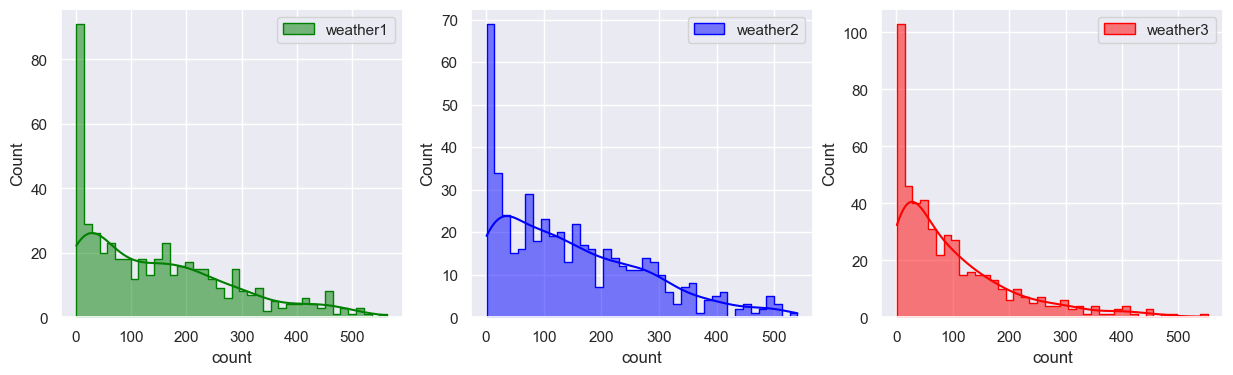

In [63]:
#Visual Tests to know if the samples follow normal distribution

plt.figure(figsize = (15, 4))
plt.subplot(1, 3, 1)
sns.histplot(df_weather1.loc[:, 'count'].sample(500), bins = 40, 
             element = 'step', color = 'green', kde = True, label = 'weather1')
plt.legend()
plt.subplot(1, 3, 2)
sns.histplot(df_weather2.loc[:, 'count'].sample(500), bins = 40,
             element = 'step', color = 'blue', kde = True, label = 'weather2')
plt.legend()
plt.subplot(1, 3, 3)
sns.histplot(df_weather3.loc[:, 'count'].sample(500), bins = 40,
             element = 'step', color = 'red', kde = True, label = 'weather3')
plt.legend()
plt.plot()


* It can be inferred from the above plot that the distributions do not follow normal distribution.

[]

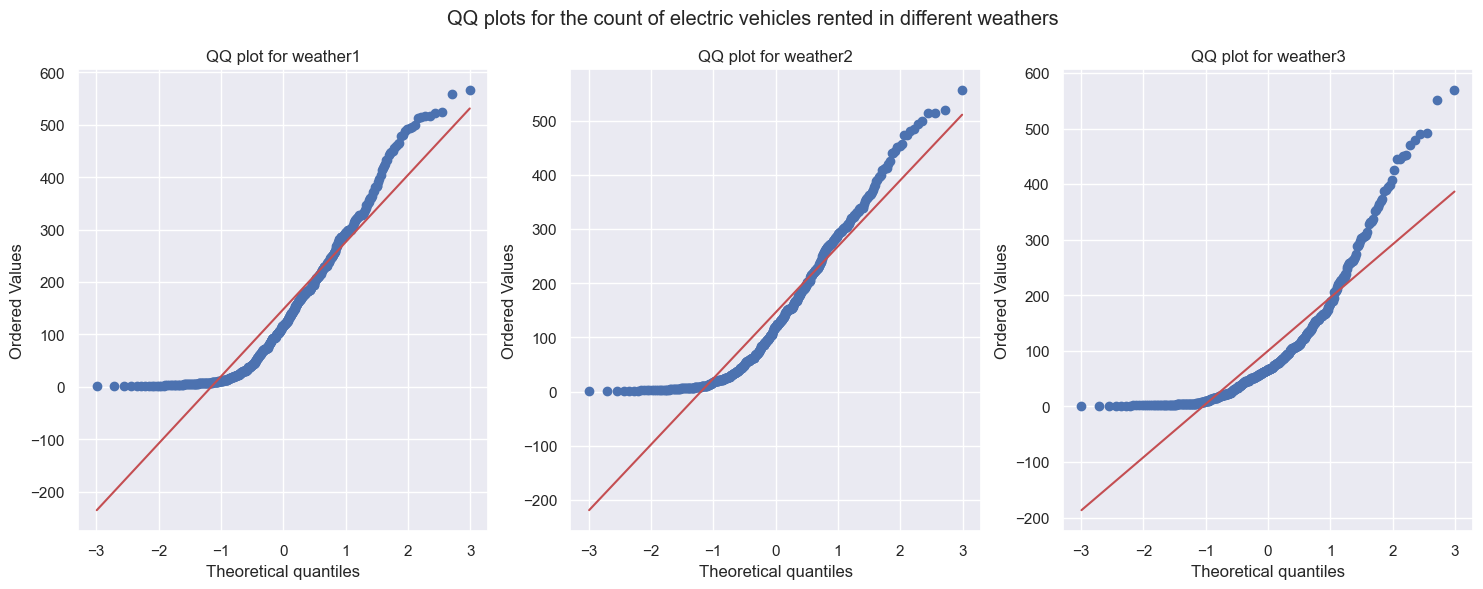

In [64]:
#Distribution check using QQ Plot

plt.figure(figsize = (18, 6))
plt.subplot(1, 3, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in different weathers')
spy.probplot(df_weather1.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather1')
plt.subplot(1, 3, 2)
spy.probplot(df_weather2.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather2')
plt.subplot(1, 3, 3)
spy.probplot(df_weather3.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather3')
plt.plot()



* It can be inferred from the above plot that the distributions do not follow normal distribution.

It can be seen from the above plots that the samples do not come from normal distribution.

* Applying Shapiro-Wilk test for normality

Ho : The sample follows normal distribution

Ha : The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [65]:
test_stat, p_value = spy.shapiro(df_weather1.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')   

p-value 1.2873508487858316e-16
The sample does not follow normal distribution


In [66]:
test_stat, p_value = spy.shapiro(df_weather3.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 1.479670943761866e-22
The sample does not follow normal distribution


* Homogeneity of Variances using Levene's test

In [67]:
# Null Hypothesis(H0) - Homogenous Variance 

# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = spy.levene(df_weather1.loc[:, 'count'].sample(500),
                                df_weather2.loc[:, 'count'].sample(500),
                                df_weather3.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 6.016519671562889e-10
The samples do not have  Homogenous Variance


Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis H-test for independent samples.

In [68]:
df_weather_1 = df_weather1['weather']
df_weather_2 = df_weather2['weather']
df_weather_3 = df_weather3['weather']
df_weather_4 = df_weather4['weather']

In [69]:
# Ho : Mean no. of cycles rented is same for different weather
# Ha : Mean no. of cycles rented is different for different weather
# Assuming significance Level to be 0.05
alpha = 0.05
test_stat, p_value = spy.kruskal(df_weather1.loc[:, 'count'].sample(500),
                                df_weather2.loc[:, 'count'].sample(500),
                                df_weather3.loc[:, 'count'].sample(500))  
print('Test Statistic =', test_stat)
print('p value =', p_value)

Test Statistic = 60.951404710626164
p value = 5.81528006082438e-14


In [70]:
if p_value < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


# Therefore, the average number of rental bikes is statistically different for different weathers.

# 5. Check if the demand of bicycles on rent is the same for different Seasons?
* Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)
* Select an appropriate test -
i. Hint: One-way ANOVA test
* Check assumptions of the test
i. Normality
Hint:
1. Use Histogram, Q-Q Plot, Skewness & Kurtosis
2. Shapiro-Wilk’s test
ii. Equality Variance
Hint:
1. Levene’s test
iii. Please continue doing the analysis even if some assumptions fail
(Levene’s test or Shapiro-wilk test) but double check using visual
analysis and report wherever necessary.
* Set a significance level and Calculate the test Statistics / p-value.
i. Hint: alpha=5% is recommended
* Decide whether to accept or reject the Null Hypothesis.
Hint:
i. If the p-value is less than or equal to the predetermined level of
significance (alpha), we have evidence to reject the null hypothesis.
ii. If the p-value is greater than the predetermined level of significance
(alpha), we do not have sufficient evidence to reject the null hypothesis.
* Draw inferences & conclusions from the analysis and provide recommendations.

In [71]:
df_season_spring = data.loc[df['season'] == 1, 'count']
df_season_summer = data.loc[df['season'] == 2, 'count']
df_season_fall = data.loc[df['season'] == 3, 'count']
df_season_winter = data.loc[df['season'] == 4, 'count']
len(df_season_spring), len(df_season_summer), len(df_season_fall), len(df_season_winter)

(2463, 2292, 2288, 2474)

[]

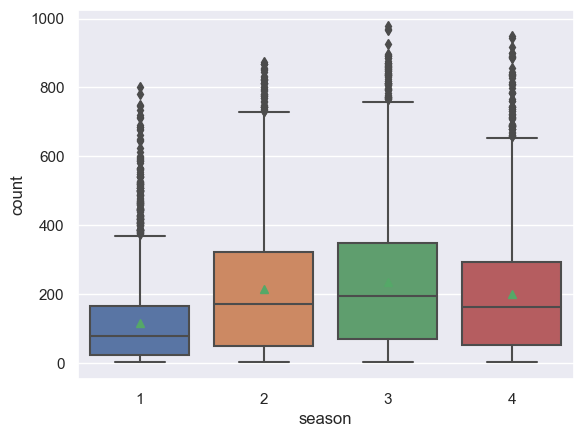

In [72]:
sns.boxplot(data = df, x = 'season', y = 'count', showmeans = True)
plt.plot()



* STEP-1 : Set up Null Hypothesis

    Null Hypothesis ( H0 ) - Mean of cycle rented per hour is same for season 1,2,3 and 4.

    Alternate Hypothesis ( HA ) -Mean of cycle rented per hour is different for season 1,2,3 and 4.

* STEP-2 : Checking for basic assumpitons for the hypothesis

    Normality check using QQ Plot. If the distribution is not normal, use BOX-COX transform to transform it to normal distribution.

    Homogeneity of Variances using Levene's test

    Each observations are independent.

* STEP-3: Define Test statistics

The test statistic for a One-Way ANOVA is denoted as F. For an independent variable with k groups, the F statistic evaluates whether the group means are significantly different.

F=MSB/MSW

Under H0, the test statistic should follow F-Distribution.

* STEP-4: Decide the kind of test.

We will be performing right tailed f-test

* STEP-5: Compute the p-value and fix value of alpha.

we will be computing the anova-test p-value using the f_oneway function using scipy.stats. We set our alpha to be 0.05

* STEP-6: Compare p-value and alpha.

Based on p-value, we will accept or reject H0. p-val > alpha : Accept H0 p-val < alpha : Reject H0

The one-way ANOVA compares the means between the groups you are interested in and determines whether any of those means are statistically significantly different from each other.

Specifically, it tests the null hypothesis (H0):

µ1 = µ2 = µ3 = ..... = µk

where, µ = group mean and k = number of groups.

If, however, the one-way ANOVA returns a statistically significant result, we accept the alternative hypothesis (HA), which is that there are at least two group means that are statistically significantly different from each other.


[]

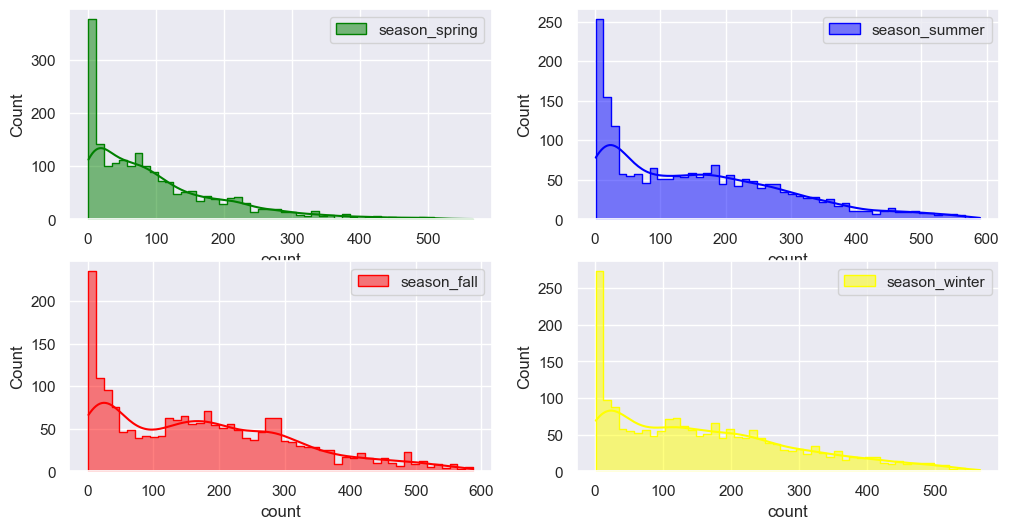

In [73]:
plt.figure(figsize = (12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df_season_spring.sample(2000), bins = 50, 
             element = 'step', color = 'green', kde = True, label = 'season_spring')
plt.legend()
plt.subplot(2, 2, 2)
sns.histplot(df_season_summer.sample(2000), bins = 50,
             element = 'step', color = 'blue', kde = True, label = 'season_summer')
plt.legend()
plt.subplot(2, 2, 3)
sns.histplot(df_season_fall.sample(2000), bins = 50,
             element = 'step', color = 'red', kde = True, label = 'season_fall')
plt.legend()
plt.subplot(2, 2, 4)
sns.histplot(df_season_winter.sample(2000), bins = 50,
             element = 'step', color = 'yellow', kde = True, label = 'season_winter')
plt.legend()
plt.plot()

[]

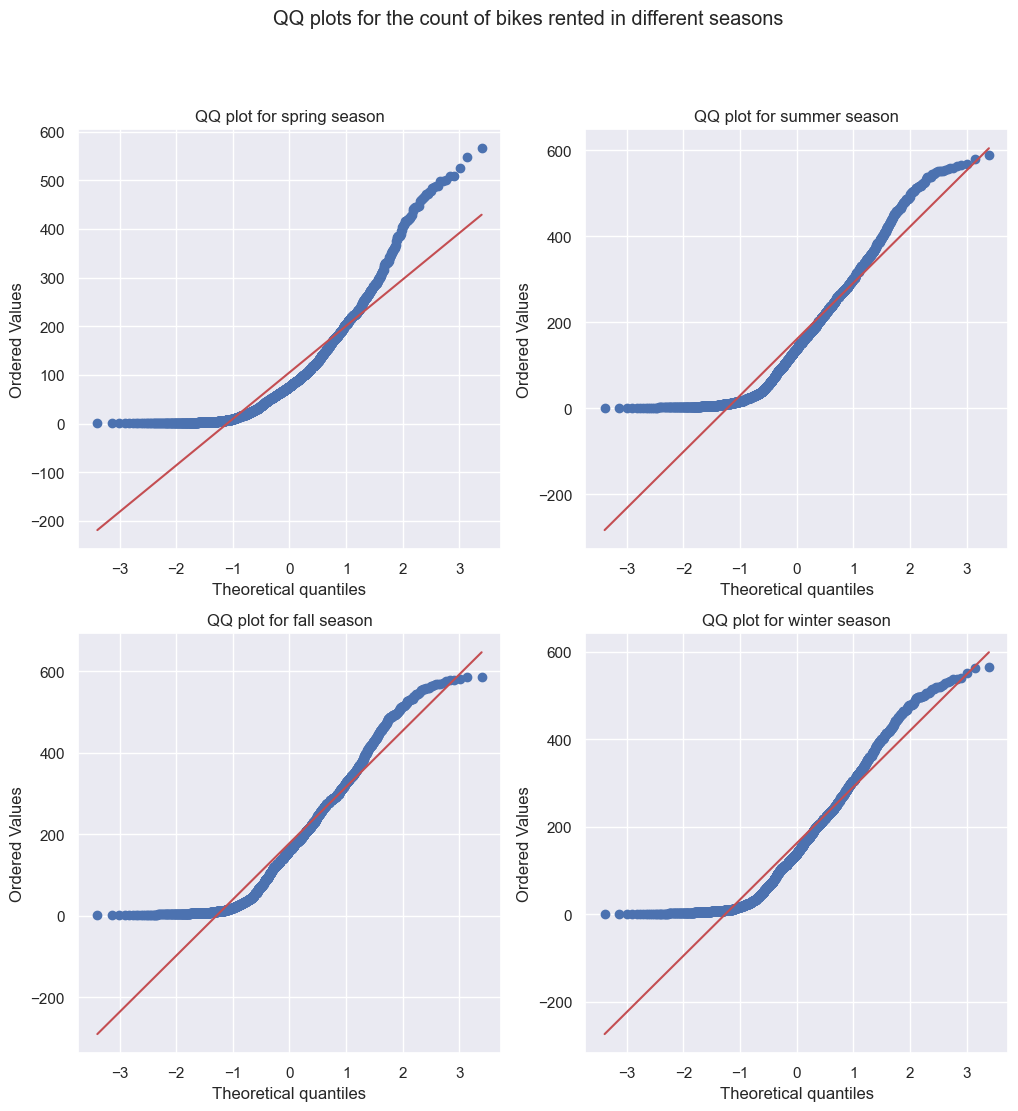

In [74]:
# Distribution check using QQ Plot
plt.figure(figsize = (12, 12))
plt.subplot(2, 2, 1)
plt.suptitle('QQ plots for the count of bikes rented in different seasons')
spy.probplot(df_season_spring.sample(2000), plot = plt, dist = 'norm')
plt.title('QQ plot for spring season')

plt.subplot(2, 2, 2)
spy.probplot(df_season_summer.sample(2000), plot = plt, dist = 'norm')
plt.title('QQ plot for summer season')

plt.subplot(2, 2, 3)
spy.probplot(df_season_fall.sample(2000), plot = plt, dist = 'norm')
plt.title('QQ plot for fall season')

plt.subplot(2, 2, 4)
spy.probplot(df_season_winter.sample(2000), plot = plt, dist = 'norm')
plt.title('QQ plot for winter season')
plt.plot()



* It can be inferred from the above plots that the distributions do not follow normal distribution.

* It can be seen from the above plots that the samples do not come from normal distribution.

* Applying Shapiro-Wilk test for normality

Ho: The sample follows normal distribution

Ha: The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [75]:
test_stat, p_value = spy.shapiro(df_season_spring.sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')   

p-value 2.2543290953932992e-39
The sample does not follow normal distribution


In [76]:
test_stat, p_value = spy.shapiro(df_season_summer.sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 1.029361477556029e-31
The sample does not follow normal distribution


In [77]:
test_stat, p_value = spy.shapiro(df_season_fall.sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 2.0973443298218837e-29
The sample does not follow normal distribution


In [78]:
test_stat, p_value = spy.shapiro(df_season_winter.sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 4.4736204164046246e-30
The sample does not follow normal distribution


In [79]:
#Homogeneity of Variances using Levene's test

# Null Hypothesis(H0) - Homogenous Variance 

# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = spy.levene(df_season_spring.sample(2000),
                                df_season_summer.sample(2000),
                                df_season_fall.sample(2000),
                                df_season_winter.sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 6.816976698354571e-67
The samples do not have  Homogenous Variance


Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis H-test for independent samples.

In [80]:
# Ho : Mean no. of cycles rented is same for different weather
# Ha : Mean no. of cycles rented is different for different weather
# Assuming significance Level to be 0.05
alpha = 0.05
test_stat, p_value = spy.kruskal(df_season_spring, df_season_summer, df_season_fall,df_season_winter)  
print('Test Statistic =', test_stat)
print('p value =', p_value)

Test Statistic = 429.22953159388226
p value = 1.0310616314096259e-92


In [81]:
if p_value < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


Reject Null Hypothesis

Therefore, the average number of rental bikes is statistically different for different seasons.

# 6. Check if the Weather conditions are significantly different during different Seasons?
* Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)
i. Hint: The values in ‘Weather’ &‘Season’ columns should be treated as
distinct Categories. Encode them accordingly.
* Select an appropriate test -
i. Hint: Chi-square test
* Create a Contingency Table against ‘Weather’ & ‘Season’ columns
i. Hint: You can use a Pandas’ CrossTab
* Set a significance level and Calculate the test Statistics / p-value.
i. Hint: alpha=5% is recommended
* Decide whether to accept or reject the Null Hypothesis.
Hint:
i. If the p-value is less than or equal to the predetermined level of
significance (alpha), we have evidence to reject the null hypothesis.
ii. If the p-value is greater than the predetermined level of significance
(alpha), we do not have sufficient evidence to reject the null hypothesis.
* Draw inferences & conclusions from the analysis and provide recommendations.



* STEP-1 : Set up Null Hypothesis

    Null Hypothesis ( H0 ) - Weather conditions are not significantly different during different Seasons

    Alternate Hypothesis ( HA ) - Weather conditions are significantly different during different Seasons

* STEP-2: Define Test statistics

Since we have two categorical features, the Chi- square test is applicable here. Under H0, the test statistic should follow Chi-Square Distribution.

* STEP-3: Checking for basic assumptons for the hypothesis (Non-Parametric Test)

    The data in the cells should be frequencies, or counts of cases.
    The levels (or categories) of the variables are mutually exclusive. That is, a particular subject fits into one and only one level of each of the variables.
    There are 2 variables, and both are measured as categories.
    The value of the cell expecteds should be 5 or more in at least 80% of the cells, and no cell should have an expected of less than one (3).

* STEP-4: Compute the p-value and fix value of alpha.

we will be computing the chi square-test p-value using the chi2_contingency function using scipy.stats. We set our alpha to be 0.05

* STEP-5: Compare p-value and alpha.

Based on p-value, we will accept or reject H0.

    p-val > alpha : Accept H0
    p-val < alpha : Reject H0

The Chi-square statistic is a non-parametric (distribution free) tool designed to analyze group differences when the dependent variable is measured at a nominal level. Like all non-parametric statistics, the Chi-square is robust with respect to the distribution of the data. Specifically, it does not require equality of variances among the study groups or homoscedasticity in the data.


In [82]:
# First, finding the contingency table such that each value is the total number of total bikes rented 
  # for a particular season and weather 
cross_table = pd.crosstab(index = df['season'], 
                          columns = df['weather'], 
                          values = df['count'], 
                          aggfunc = np.sum).replace(np.nan, 0)
cross_table

weather,1,2,3,4
season,,,,
1,223009.0,76406.0,12919.0,164.0
2,426350.0,134177.0,27755.0,0.0
3,470116.0,139386.0,31160.0,0.0
4,356588.0,157191.0,30255.0,0.0


Since the above contingency table has one column in which the count of the rented electric vehicle is less than 5 in most of the cells, we can remove the weather 4 and then proceed further.

In [83]:
cross_table = pd.crosstab(index = df['season'], 
                          columns = df.loc[df['weather'] != 4, 'weather'], 
                          values = df['count'], 
                          aggfunc = np.sum).to_numpy()[:, :3]
cross_table

array([[223009,  76406,  12919],
       [426350, 134177,  27755],
       [470116, 139386,  31160],
       [356588, 157191,  30255]], dtype=int64)

In [84]:
chi_test_stat, p_value, dof, expected = spy.chi2_contingency(observed = cross_table)
print('Test Statistic =', chi_test_stat)
print('p value =', p_value)
print('-' * 65)
print("Expected : '\n'", expected)

Test Statistic = 10838.372332480214
p value = 0.0
-----------------------------------------------------------------
Expected : '
' [[221081.86259035  75961.44434981  15290.69305984]
 [416408.3330293  143073.60199337  28800.06497733]
 [453484.88557396 155812.72247031  31364.39195574]
 [385087.91880639 132312.23118651  26633.8500071 ]]


In [85]:
if p_value < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis




Reject Null Hypothesis

Therefore, there is statistically significant dependency of weather and season based on the number of number of bikes rented.


# Insights

* The data is given from Timestamp('2011-01-01 00:00:00') to Timestamp('2012-12-19 23:00:00'). The total time period for which the data is given is '718 days 23:00:00'.
* Out of every 100 users, around 19 are casual users and 81 are registered users.
* The mean total hourly count of rental bikes is 144 for the year 2011 and 239 for the year 2012. An annual growth rate of 65.41 % can be seen in the demand of electric vehicles on an hourly basis.
* There is a seasonal pattern in the count of rental bikes, with higher demand during the spring and summer months, a slight decline in the fall, and a further decrease in the winter months.
* The average hourly count of rental bikes is the lowest in the month of January followed by February and March.
* There is a distinct fluctuation in count throughout the day, with low counts during early morning hours, a sudden increase in the morning, a peak count in the afternoon, and a gradual decline in the evening and nighttime.
* More than 80 % of the time, the temperature is less than 28 degrees celcius.
* More than 80 % of the time, the humidity value is greater than 40. Thus for most of the time, humidity level varies from optimum to too moist.
* More than 85 % of the total, windspeed data has a value of less than 20.
* The hourly count of total rental bikes is the highest in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions.
* The mean hourly count of the total rental bikes is statistically similar for both working and non- working days.
* There is statistically significant dependency of weather and season based on the hourly total number of bikes rented.
* The hourly total number of rental bikes is statistically different for different weathers.
* There is no statistically significant dependency of weather 1, 2, 3 on season based on the average hourly total number of bikes rented.
* The hourly total number of rental bikes is statistically different for different seasons.




# Recommendations

   * Seasonal Marketing: Since there is a clear seasonal pattern in the count of rental bikes, Yulu can adjust its marketing strategies accordingly. Focus on promoting bike rentals during the spring and summer months when there is higher demand. Offer seasonal discounts or special packages to attract more customers during these periods.

   * Time-based Pricing: Take advantage of the hourly fluctuation in bike rental counts throughout the day. Consider implementing time-based pricing where rental rates are lower during off-peak hours and higher during peak hours. This can encourage customers to rent bikes during less busy times, balancing out the demand and optimizing the resources.

   * Weather-based Promotions: Recognize the impact of weather on bike rentals. Create weather-based promotions that target customers during clear and cloudy weather, as these conditions show the highest rental counts. Yulu can offer weather-specific discounts to attract more customers during these favorable weather conditions.

   * User Segmentation: Given that around 81% of users are registered, and the remaining 19% are casual, Yulu can tailor its marketing and communication strategies accordingly. Provide loyalty programs, exclusive offers, or personalized recommendations for registered users to encourage repeat business. For casual users, focus on providing a seamless rental experience and promoting the benefits of bike rentals for occasional use.

   * Optimize Inventory: Analyze the demand patterns during different months and adjust the inventory accordingly. During months with lower rental counts such as January, February, and March, Yulu can optimize its inventory levels to avoid excess bikes. On the other hand, during peak months, ensure having sufficient bikes available to meet the higher demand.

   * Improve Weather Data Collection: Given the lack of records for extreme weather conditions, consider improving the data collection process for such scenarios. Having more data on extreme weather conditions can help to understand customer behavior and adjust the operations accordingly, such as offering specialized bike models for different weather conditions or implementing safety measures during extreme weather.

   * Customer Comfort: Since humidity levels are generally high and temperature is often below 28 degrees Celsius, consider providing amenities like umbrellas, rain jackets, or water bottles to enhance the comfort and convenience of the customers. These small touches can contribute to a positive customer experience and encourage repeat business.

   * Collaborations with Weather Services: Consider collaborating with weather services to provide real-time weather updates and forecasts to potential customers. Incorporate weather information into your marketing campaigns or rental app to showcase the ideal biking conditions and attract users who prefer certain weather conditions.

   * Seasonal Bike Maintenance: Allocate resources for seasonal bike maintenance. Before the peak seasons, conduct thorough maintenance checks on the bike fleet to ensure they are in top condition. Regularly inspect and service bikes throughout the year to prevent breakdowns and maximize customer satisfaction.

   * Customer Feedback and Reviews: Encourage customers to provide feedback and reviews on their biking experience. Collecting feedback can help identify areas for improvement, understand customer preferences, and tailor the services to better meet customer expectations.

   * Social Media Marketing: Leverage social media platforms to promote the electric bike rental services. Share captivating visuals of biking experiences in different weather conditions, highlight customer testimonials, and engage with potential customers through interactive posts and contests. Utilize targeted advertising campaigns to reach specific customer segments and drive more bookings.

   * Special Occasion Discounts: Since Yulu focusses on providing a sustainable solution for vehicular pollution, it should give special discounts on the occassions like Zero Emissions Day (21st September), Earth day (22nd April), World Environment Day (5th June) etc in order to attract new users.

